<a href="https://colab.research.google.com/github/ugurhangull/machine_learning_heart_failure/blob/main/heart_failure_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (299, 13)
Dataset Columns: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
Missing Values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


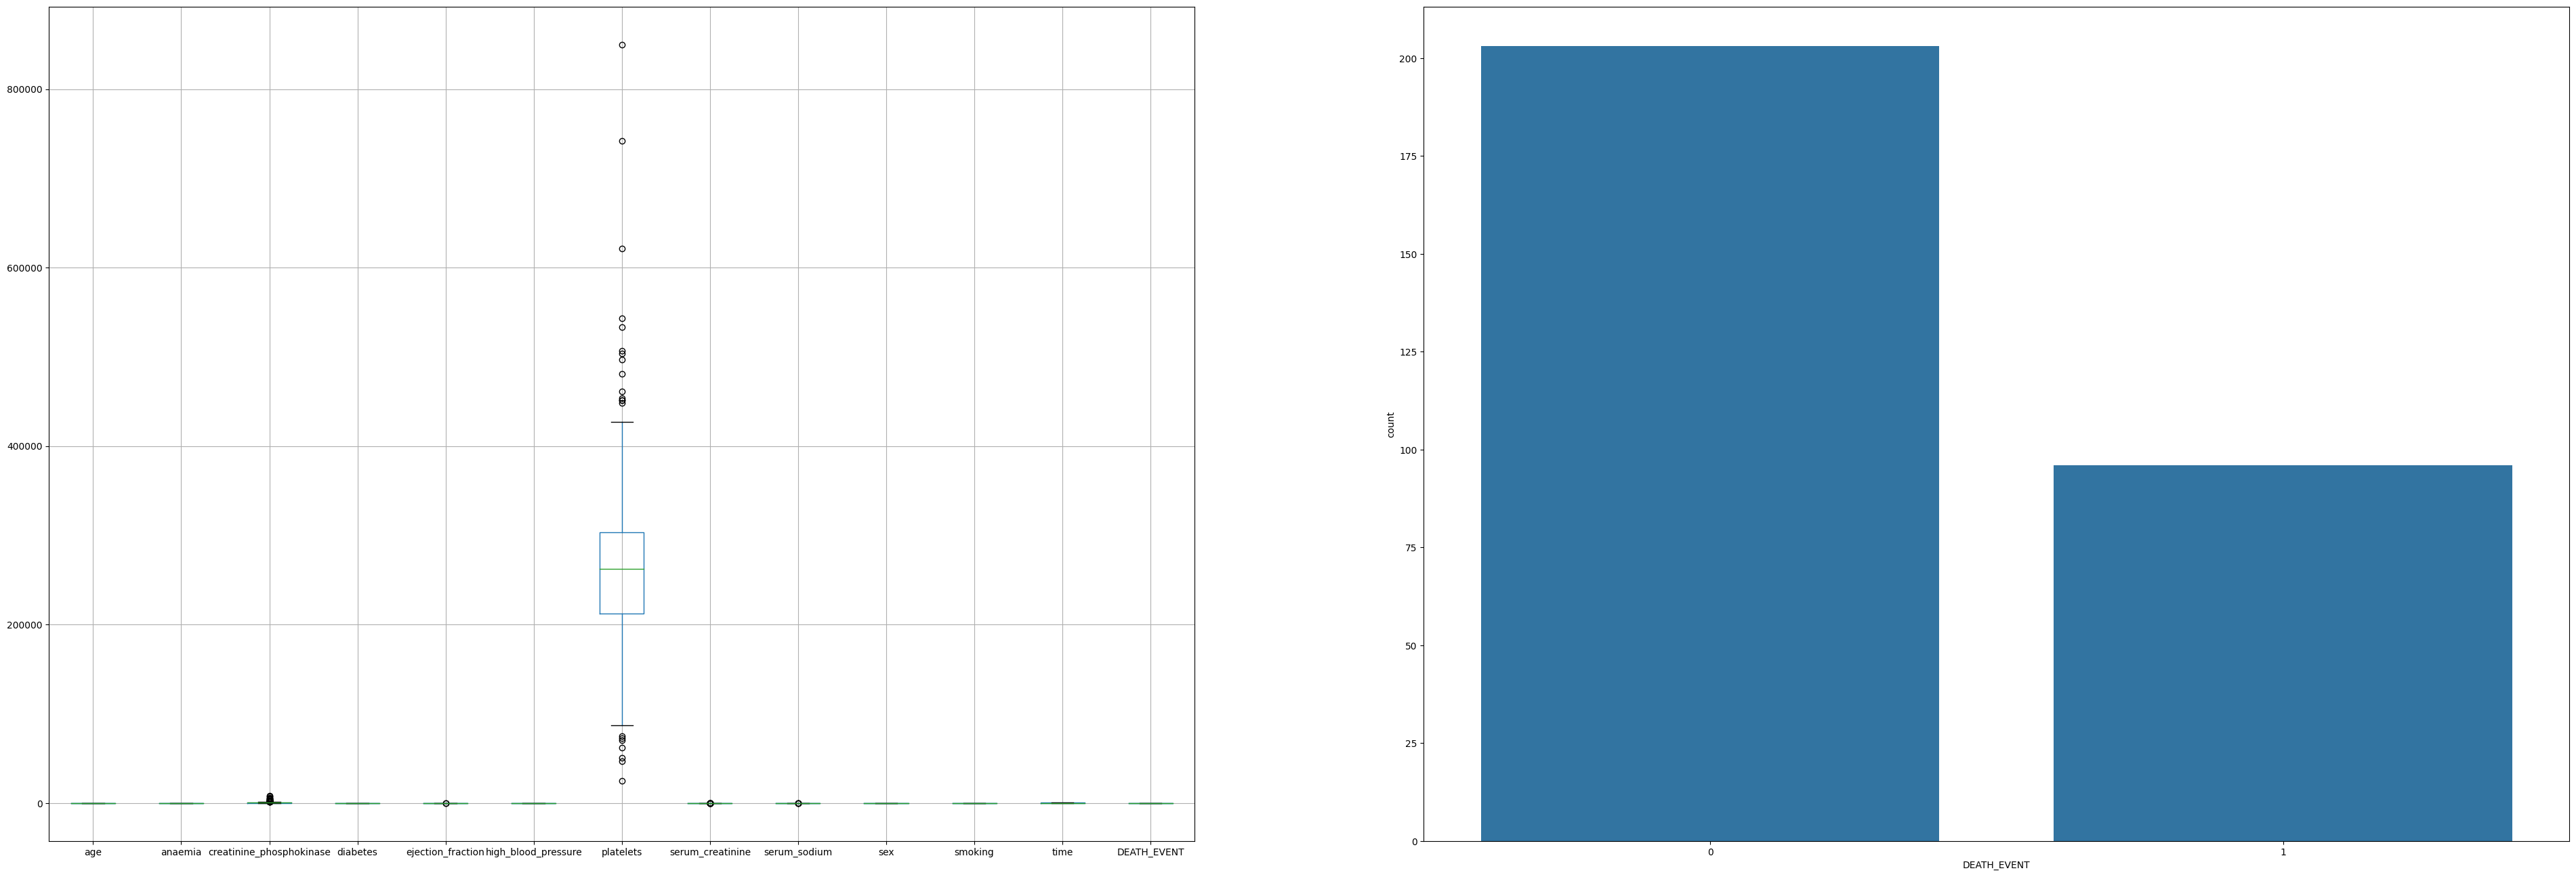

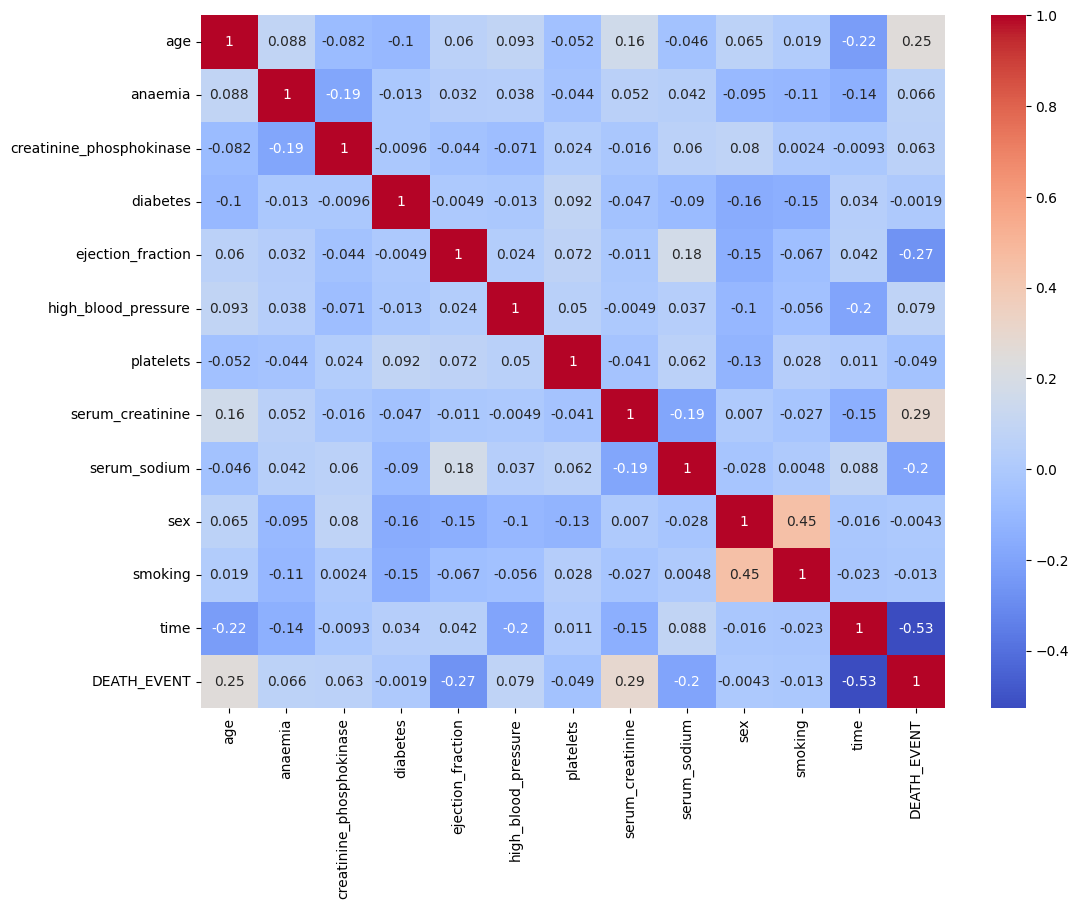

Logistic Regression Model Performance:
Accuracy: 0.7875
Precision: 0.8108
Recall: 0.7500
F1-Score: 0.7792
Confusion Matrix:
[[33  7]
 [10 30]]

Decision Tree Model Performance:
Accuracy: 0.8750
Precision: 0.8409
Recall: 0.9250
F1-Score: 0.8810
Confusion Matrix:
[[33  7]
 [ 3 37]]

Random Forest Model Performance:
Accuracy: 0.8750
Precision: 0.8571
Recall: 0.9000
F1-Score: 0.8780
Confusion Matrix:
[[34  6]
 [ 4 36]]

Support Vector Machine Model Performance:
Accuracy: 0.8000
Precision: 0.8158
Recall: 0.7750
F1-Score: 0.7949
Confusion Matrix:
[[33  7]
 [ 9 31]]

K-Nearest Neighbors Model Performance:
Accuracy: 0.7500
Precision: 0.7941
Recall: 0.6750
F1-Score: 0.7297
Confusion Matrix:
[[33  7]
 [13 27]]


Hyperparameter Tuning for Logistic Regression
Best Parameters: {'C': 0.615848211066026}
Best F1-Score: 0.8468

Hyperparameter Tuning for Decision Tree
Best Parameters: {'max_depth': 6}
Best F1-Score: 0.8255

Hyperparameter Tuning for Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.



Best Parameters: {'n_estimators': 200, 'max_depth': 8}
Best F1-Score: 0.8714

Hyperparameter Tuning for Support Vector Machine
Best Parameters: {'gamma': 0.00026366508987303583, 'C': 3792.690190732246}
Best F1-Score: 0.8526

Hyperparameter Tuning for K-Nearest Neighbors
Best Parameters: {'n_neighbors': 5}
Best F1-Score: 0.8281


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.




Logistic Regression Cross-Validation F1-Scores:
[0.76086957 0.71604938 0.83783784 0.90666667 0.93150685]
Mean F1-Score: 0.8306

Decision Tree Cross-Validation F1-Scores:
[0.6779661  0.74285714 0.63636364 0.84090909 0.81578947]
Mean F1-Score: 0.7428

Random Forest Cross-Validation F1-Scores:
[0.68376068 0.73972603 0.8974359  0.87804878 0.91666667]
Mean F1-Score: 0.8231

Support Vector Machine Cross-Validation F1-Scores:
[0.77894737 0.73684211 0.85333333 0.90909091 0.89189189]
Mean F1-Score: 0.8340

K-Nearest Neighbors Cross-Validation F1-Scores:
[0.68085106 0.65       0.77108434 0.91139241 0.83116883]
Mean F1-Score: 0.7689


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.express import scatter
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def load_data(file_path):
    data = pd.read_csv(file_path)
    print(f"Dataset Shape: {data.shape}")
    print(f"Dataset Columns: {data.columns.tolist()}")
    print(f"Missing Values:\n{data.isnull().sum()}")
    return data

def visualize_2d(data):
    X = data.drop(['DEATH_EVENT'], axis=1)
    y = data['DEATH_EVENT']

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    fig = scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y, title='2D Visualization with PCA')
    fig.show()

import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

def preprocess_data(data):
    # Removing Outliers and Log Transformation
    z_scores = np.abs((data['creatinine_phosphokinase'] - data['creatinine_phosphokinase'].mean()) / data['creatinine_phosphokinase'].std())
    data = data[z_scores < 3]
    z_scores = np.abs((data['serum_creatinine'] - data['serum_creatinine'].mean()) / data['serum_creatinine'].std())
    data = data[z_scores < 3]

    data.loc[:, 'log_creatinine'] = np.log(data['serum_creatinine'])

    X = data.drop(['DEATH_EVENT'], axis=1)
    y = data['DEATH_EVENT']

    # Handling Class Imbalance
    smote = SMOTE()
    X, y = smote.fit_resample(X, y)

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

def explore_data(data):
    fig, axes = plt.subplots(1, 2, figsize=(48, 16))
    data.boxplot(ax=axes[0])
    sns.countplot(x='DEATH_EVENT', data=data, ax=axes[1])
    plt.show()

    plt.figure(figsize=(12, 9))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.show()

def print_model_performance(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"{name} Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

def train_and_evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42)),
        ('Support Vector Machine', SVC(random_state=42)),
        ('K-Nearest Neighbors', KNeighborsClassifier())
    ]

    for name, model in models:
        model.fit(X_train, y_train)
        print_model_performance(name, model, X_test, y_test)

    param_distributions = {
        'LogisticRegression': {'C': np.logspace(-4, 4, 20)},
        'DecisionTreeClassifier': {'max_depth': [2, 4, 6, 8, 10, None]},
        'RandomForestClassifier': {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [2, 4, 6, 8, 10, None]},
        'SVC': {'C': np.logspace(-4, 4, 20), 'gamma': np.logspace(-4, 4, 20)},
        'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 9, 11]}
    }

    for name, model in models:
        print(f"\nHyperparameter Tuning for {name}")
        param_dist = param_distributions[model.__class__.__name__]
        search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=20, random_state=42, scoring='f1')
        search.fit(X_train, y_train)
        print(f"Best Parameters: {search.best_params_}")
        print(f"Best F1-Score: {search.best_score_:.4f}")

    for name, model in models:
        scores = cross_val_score(model, X, y, cv=5, scoring='f1')
        print(f"\n{name} Cross-Validation F1-Scores:")
        print(scores)
        print(f"Mean F1-Score: {scores.mean():.4f}")

if __name__ == "__main__":
    file_path = 'heart_failure_clinical_records_dataset.csv'
    data = load_data(file_path)

    # Data Understanding
    visualize_2d(data)
    explore_data(data)

    # Preprocessing
    X, y = preprocess_data(data)

    # Baseline Model Building and Model Evaluation
    train_and_evaluate_models(X, y)
